In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.colors as colors

import numpy as np
import pandas as pd


<H1>Zbior danych diabets</H1>

In [4]:
diabets = datasets.load_diabetes(scaled=False,as_frame=True)

In [5]:
diabets['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

<h2>Zmienne objasniajace</h2>

In [6]:
df_diabets = diabets['data']

In [7]:
df_diabets

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


<h2>Zmienna objasniana</h2>

In [5]:
y = diabets['target']

<h2>Podzial na uczacy i testowy</h2>

In [6]:
df_modeling = df_diabets[['bmi']]
X_train, X_test, y_train, y_test = train_test_split( df_modeling, y )

<h2>Modelujemy ryzyko cukrzycy w przyszlym roku jako funkcja BMI</h2>

In [7]:
#Wybieramy model
regr = linear_model.LinearRegression()
#trenujemy model
regr.fit(X_train, y_train)

# Robimy predykcje na zbiorze uczacym i testowym
diabetes_pred_train = regr.predict(X_train)
diabetes_pred_test = regr.predict(X_test)

<h2>Oceniamy model</h2>

In [8]:
print('Na zbiorze uczacym')
print("Mean squared error: %.2f" % mean_squared_error(y_train, diabetes_pred_train))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_train, diabetes_pred_train))
print("Coefficient of determination: %.2f" % r2_score(y_train, diabetes_pred_train))
print('Na zbiorze testowym')
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_pred_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, diabetes_pred_test))
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_pred_test))

Na zbiorze uczacym
Mean squared error: 3855.22
Root mean squared error: 62.09
Coefficient of determination: 0.32
Na zbiorze testowym
Mean squared error: 4052.64
Root mean squared error: 63.66
Coefficient of determination: 0.38


<H2>Wizualizacja</H2>

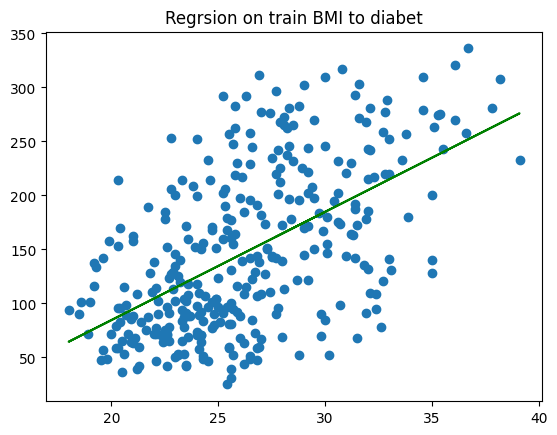

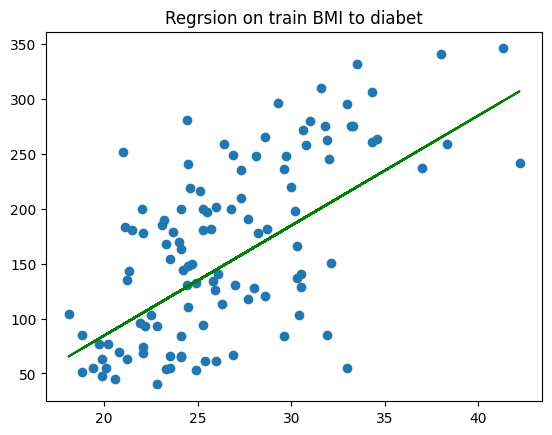

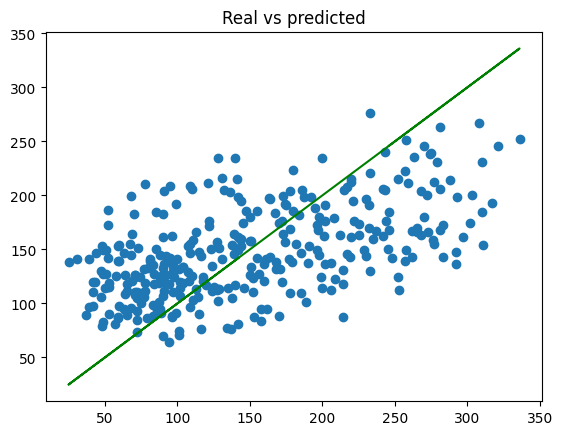

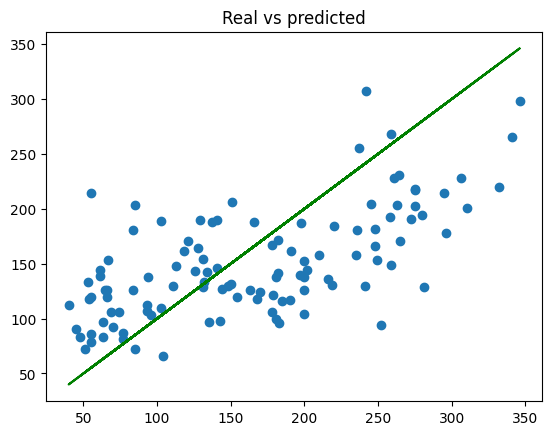

In [9]:
plt.scatter( X_train, y_train )
plt.plot(X_train, diabetes_pred_train, color='green')
plt.title("Regrsion on train BMI to diabet")
plt.show()

plt.scatter( X_test, y_test )
plt.plot(X_test, diabetes_pred_test, color='green')
plt.title("Regrsion on train BMI to diabet")
plt.show()

plt.scatter( y_train, diabetes_pred_train )
plt.plot(y_train, y_train, color='green')
plt.title("Real vs predicted")
plt.show()

plt.scatter(  y_test, diabetes_pred_test, )
plt.plot(y_test, y_test, color='green')
plt.title("Real vs predicted")
plt.show()

<H2>Sprobujmy zwizualizowac uczacy i testowy razem</H2>

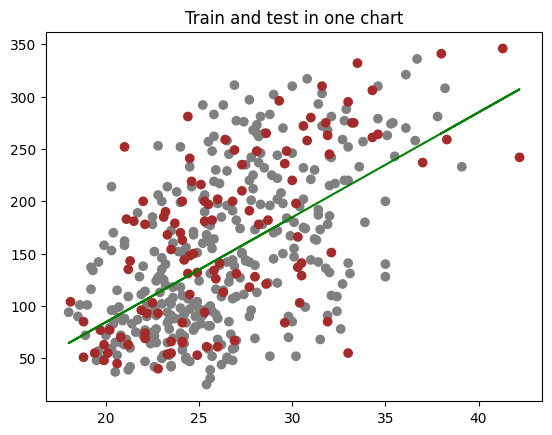

In [10]:
cmap4 = colors.ListedColormap(["grey", "blue", "red", "green", "black", "magenta", "pink", "brown"])

train_part = pd.DataFrame({'bmi': X_train['bmi'].to_list(), 'target': y_train.to_list(), 'prediction':diabetes_pred_train })
train_part['set_num'] = 0

test_part = pd.DataFrame({'bmi': X_test['bmi'].to_list(), 'target': y_test.to_list(), 'prediction':diabetes_pred_test })
test_part['set_num'] = 1

all_parts = pd.concat( [train_part, test_part] )


plt.scatter( all_parts['bmi'], all_parts['target'], c=all_parts['set_num'],cmap=cmap4)
plt.plot(all_parts['bmi'], all_parts['prediction'], color='green')
plt.title("Train and test in one chart" ) 
plt.show()

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([18.  , 20.42, 22.84, 25.26, 27.68, 30.1 , 32.52, 34.94, 37.36,
        39.78, 42.2 ]),
 <BarContainer object of 10 artists>)

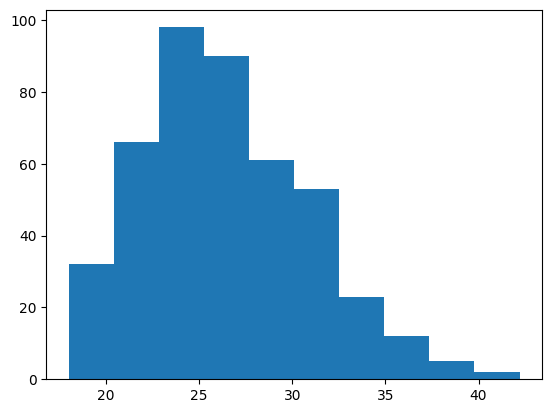

In [14]:
plt.hist( df_diabets[['bmi']] )

<H2>Sprawdzmy transormacje zmiennej</H2>

Mean squared error: 3915.16
Root mean squared error: 62.57
Coefficient of determination: 0.31
Mean squared error: 4121.01
Root mean squared error: 64.20
Coefficient of determination: 0.37


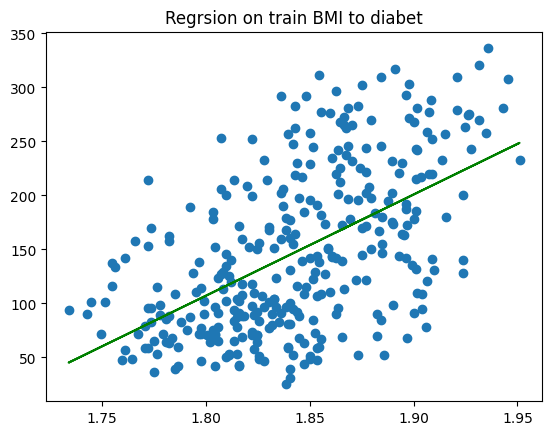

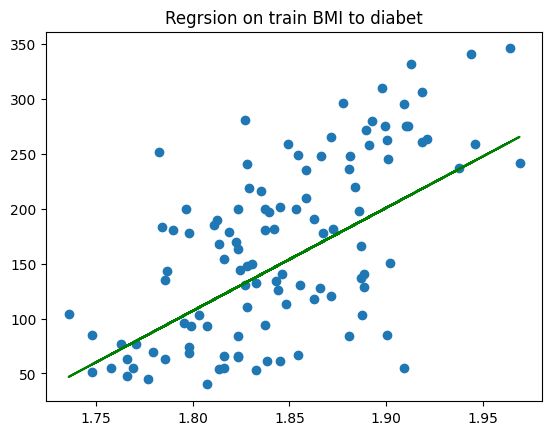

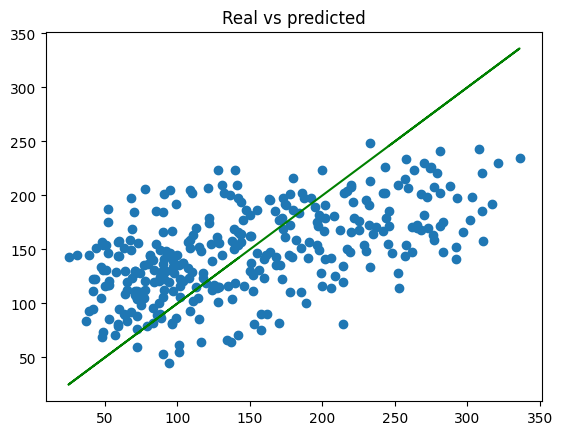

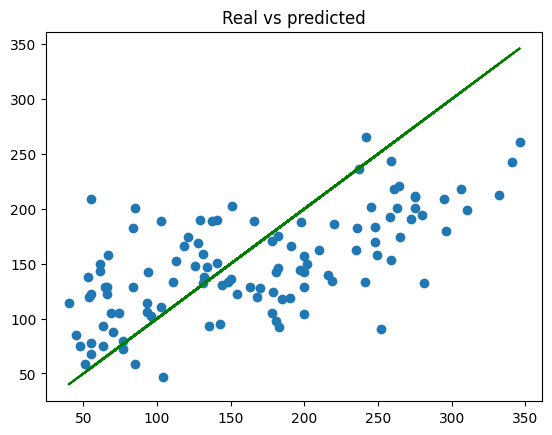

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
standard_scaler = preprocessing.StandardScaler()
power_transformer = preprocessing.PowerTransformer(method='box-cox', standardize=False)

#power_transformer = preprocessing.PowerTransformer()

#X_train_minmax = min_max_scaler.fit_transform(X_train)
#X_test_minmax = min_max_scaler.transform(X_test)

X_train_minmax = power_transformer.fit_transform(X_train)
X_test_minmax = power_transformer.transform(X_test)

#X_train_minmax = max_abs_scaler.fit_transform(X_train)
#X_test_minmax = max_abs_scaler.transform(X_test)

#X_train_minmax = standard_scaler.fit_transform(X_train)
#X_test_minmax = standard_scaler.transform(X_test)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_minmax, y_train)

# Make predictions using the testing set
diabetes_pred_train = regr.predict(X_train_minmax)
diabetes_pred_test = regr.predict(X_test_minmax)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, diabetes_pred_train))

print("Root mean squared error: %.2f" % root_mean_squared_error(y_train, diabetes_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, diabetes_pred_train))



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_pred_test))

print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, diabetes_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_pred_test))

plt.scatter( X_train_minmax, y_train )
plt.plot(X_train_minmax, diabetes_pred_train, color='green')
plt.title("Regrsion on train BMI to diabet")
plt.show()


plt.scatter( X_test_minmax, y_test )
plt.plot(X_test_minmax, diabetes_pred_test, color='green')
plt.title("Regrsion on train BMI to diabet")
plt.show()


plt.scatter( y_train, diabetes_pred_train )
plt.plot(y_train, y_train, color='green')
plt.title("Real vs predicted")
plt.show()


plt.scatter(  y_test, diabetes_pred_test, )
plt.plot(y_test, y_test, color='green')
plt.title("Real vs predicted")
plt.show()

<H2>Zbudujmy regresje na wielu zmiennych</H2>

In [12]:
df_modeling = df_diabets[['age','bmi','s1',	's2', 	's3', 	's4', 	's5', 	's6']]
y = diabets['target']

X_train, X_test, y_train, y_test = train_test_split( df_modeling, y )

Mean squared error: 2935.37
Root mean squared error: 54.18
Coefficient of determination: 0.47
Mean squared error: 3628.54
Root mean squared error: 60.24
Coefficient of determination: 0.50


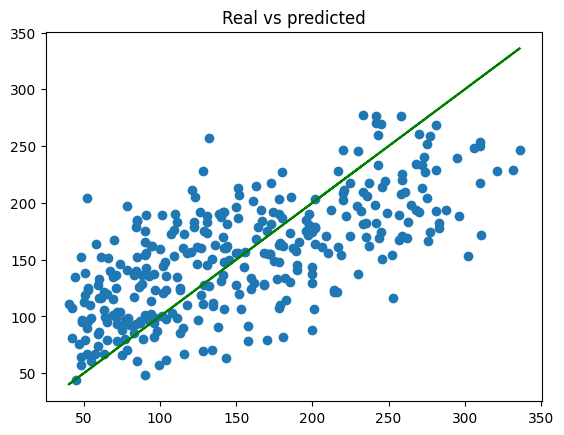

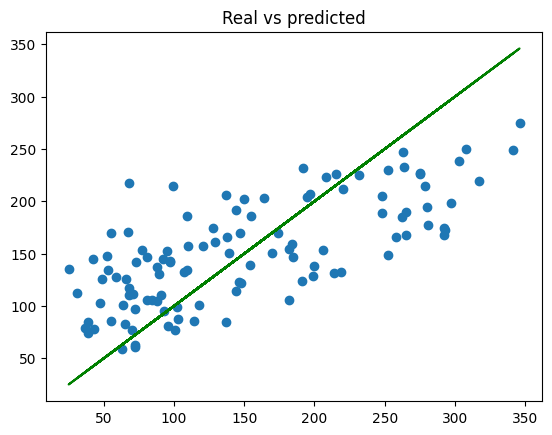

In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
diabetes_pred_train = regr.predict(X_train)
diabetes_pred_test = regr.predict(X_test)



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, diabetes_pred_train))

print("Root mean squared error: %.2f" % root_mean_squared_error(y_train, diabetes_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, diabetes_pred_train))



# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_pred_test))

print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, diabetes_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, diabetes_pred_test))





plt.scatter( y_train, diabetes_pred_train )
plt.plot(y_train, y_train, color='green')
plt.title("Real vs predicted")
plt.show()


plt.scatter(  y_test, diabetes_pred_test, )
plt.plot(y_test, y_test, color='green')
plt.title("Real vs predicted")
plt.show()


